In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import basic libraries

import numpy as np
import pandas as pd

In [3]:
# Read the datafile & save it as dataframe

leads = pd.read_csv('Leads.csv')

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
round((leads.isnull().sum()/len(leads) * 100),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

# Data Cleaning and Preparation

In [8]:
cols_null_more_than_20p = list(leads.columns[(leads.isnull().sum()/len(leads) * 100)>20])
cols_null_more_than_20p

['Country',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
# Dropping the columns with more than 20 percent null values.
leads = leads.drop(cols_null_more_than_20p, axis=1)
(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

Specialization                              15.562771
City                                        15.367965
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Magazine                                     0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Lead Number                 

In [10]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Prospect ID & Lead Number are each unique values to identify the lead information. It does not affect the outcome of the modelling.
# So, it is better to drop those columns too.

leads.drop(['Prospect ID' , 'Lead Number'], axis=1, inplace=True)
leads.shape

(9240, 24)

In [12]:
# Check the columns which are categorical.

cat_cols = leads.loc[:, leads.dtypes == 'object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# check teh variation in values for each categorical columns
for c in cat_cols:
    print(leads[c].value_counts())
    print('*'*50)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
**************************************************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
**************************************************
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
**************************************************
Do

In [14]:
# Below columns have less or no variation in their values(Imbalance data). So, it wont help in our modelling.
# So, it is better to delete below columns
    # 'Do Not Call'
    # 'Search'
    # 'Magazine'
    # 'Newspaper Article'
    # 'X Education Forums'
    # 'Newspaper'
    # 'Digital Advertisement'
    # 'Through Recommendations'
    # 'Receive More Updates About Our Courses'
    # 'Update me on Supply Chain Content'
    # 'Get updates on DM Content'
    # 'I agree to pay the amount through cheque' 

In [15]:
cols_with_less_variants = [
    'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
    'Get updates on DM Content', 'I agree to pay the amount through cheque'
    ]

# Drop the columns
leads.drop(cols_with_less_variants, axis=1, inplace=True)

print(leads.shape)

(9240, 12)


In [16]:
leads.isnull().sum().sort_values(ascending = False)

Specialization                            1438
City                                      1420
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [17]:
leads.shape

(9240, 12)

In [18]:
# Count rows where both 'Specialization' and 'City' have null values
null_rows_count = leads[leads['Specialization'].isnull() & leads['City'].isnull()].shape[0]

print(f"Number of rows with null values in both 'Specialization' and 'City': {null_rows_count}")


Number of rows with null values in both 'Specialization' and 'City': 1406


In [19]:
# most of the rows where Specialization has null values, City also has null values.
# So, dropping all null valued rows of these columns will be OK.
# Also, we can drop other rows which has null values in other columns.

In [20]:
# Drop rows with null values in any of the specified columns
leads.dropna(subset=['Specialization', 'City', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'], inplace=True)

# Print the shape after dropping
print(leads.shape)

(7629, 12)


In [21]:
#Check how much data is lost during this dropping process.

(1-7629/9240)*100

17.435064935064936

In [22]:
# We have dropped 17% rows from the intial data to remove all null values.
#Now the data is without any null values,
leads.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [23]:
#Check which of the remaining columns have option as 'Select'

for c in leads.columns:
    print(c)
    print(leads[leads[c]=='Select'].shape)

Lead Origin
(0, 12)
Lead Source
(0, 12)
Do Not Email
(0, 12)
Converted
(0, 12)
TotalVisits
(0, 12)
Total Time Spent on Website
(0, 12)
Page Views Per Visit
(0, 12)
Last Activity
(0, 12)
Specialization
(1849, 12)
City
(2156, 12)
A free copy of Mastering The Interview
(0, 12)
Last Notable Activity
(0, 12)


In [24]:
# Only Columns 'Specialization' & 'City' have data as 'Select' in it.
# Select means the lead did not chose to give those details.
# Anything other than 'Select' in those columns may be a useful data for modelling.
# So, lets create dummies & drop the column which has select type.

In [25]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7629 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7629 non-null   object 
 1   Lead Source                             7629 non-null   object 
 2   Do Not Email                            7629 non-null   object 
 3   Converted                               7629 non-null   int64  
 4   TotalVisits                             7629 non-null   float64
 5   Total Time Spent on Website             7629 non-null   int64  
 6   Page Views Per Visit                    7629 non-null   float64
 7   Last Activity                           7629 non-null   object 
 8   Specialization                          7629 non-null   object 
 9   City                                    7629 non-null   object 
 10  A free copy of Mastering The Interview  7629 non-null   object 
 

In [26]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Mumbai,No,Modified


In [27]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'City',
                              'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)


# select option in both Specialization & City does not mean anything. So, it is OK to delete it.

dummy = dummy.drop(['Specialization_Select','City_Select'], axis = 1)

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization','City','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Test Train Split

In [29]:
# Import the required library

from sklearn.model_selection import train_test_split

In [30]:
# Put all the feature variables in X
# Put the target variable in y

X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [31]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

In [33]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [34]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7629 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           7629 non-null   int64  
 1   TotalVisits                                         7629 non-null   float64
 2   Total Time Spent on Website                         7629 non-null   int64  
 3   Page Views Per Visit                                7629 non-null   float64
 4   Lead Origin_Landing Page Submission                 7629 non-null   int32  
 5   Lead Origin_Lead Add Form                           7629 non-null   int32  
 6   Lead Origin_Lead Import                             7629 non-null   int32  
 7   Lead Source_Direct Traffic                          7629 non-null   int32  
 8   Lead Source_Facebook                                7629 non-null   int32  
 9   Le

In [35]:
# Scale the three numeric features present in the dataset

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
661,0.027027,0.659771,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7895,0.027027,0.488556,0.125,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9108,0.054054,0.864877,0.250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
991,0.054054,0.257482,0.250,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6659,0.054054,0.049736,0.250,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation between all the columns

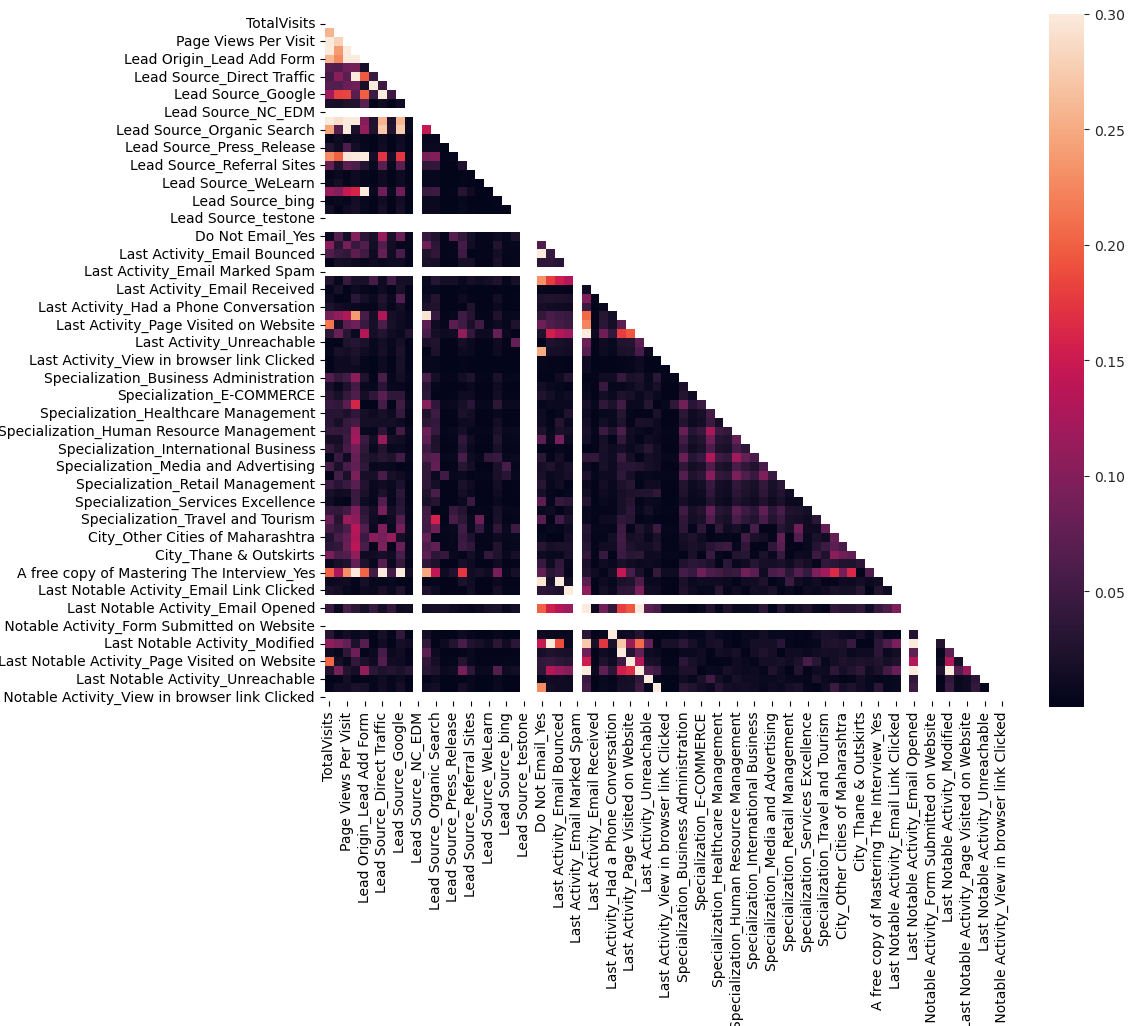

In [37]:
import matplotlib.pyplot as plt, seaborn as sns


correlation = abs(X_train.corr(numeric_only=True))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(correlation, mask=mask, vmax=.3, square=True)

In [38]:
# Since the number of varaibles are very high, it is difficult to handle such large data.
# So, it is better to reduce variables to small set of important features
# We will use RFE for that.

In [39]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

In [41]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 56),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 53),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 54),
 ('Lead Source_google', False, 23),
 ('Lead Source_testone', False, 57),
 ('Lead Source_welearnblog_Home', False, 58),
 ('Do Not Email_Yes', True, 1),
 ('Las

In [42]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

# Select only the columns selected by RFE

X_train = X_train[col]

In [43]:
# Import statsmodels
import statsmodels.api as sm

# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5324
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.5
Date:                Tue, 24 Sep 2024   Deviance:                       5024.9
Time:                        21:36:17   Pearson chi2:                 5.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3458
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.6976      0.108    -15.715      0.000      -1.909      -1.486
TotalVisits                                        1.8826      0.776      2.425      0.015       0.361       3.404
Total Time Spent on Website                        4.5530      0.167     27.218      0.000       4.225       4.881
Lead Origin_Landing Page Submission               -0.6005      0.094     -6.392      0.000      -0.785      -0.416
Lead Origin_Lead Add Form                          1.4996      0.920      1.631      0.103      -0.303       3.302
Lead Source_Olark Chat                             1.2274      0.137      8.987      0.000       0.960       1.495
Lead Source_Reference                              2.2009      0.941      2.339      0.019       0.357       4.045
Lead Source_Welingak Website                       4.4104      1.375      3.207      0.001       1.715       7.106
Do Not Email_Yes                                  -1.5942      0.207     -7.719      0.000      -1.999      -1.189
Last Activity_Converted to Lead                   -0.8643      0.202     -4.279      0.000      -1.260      -0.468
Last Activity_Email Bounced                       -0.9107      0.434     -2.097      0.036      -1.762      -0.059
Last Activity_Had a Phone Conversation             0.9621      0.788      1.222      0.222      -0.582       2.506
Last Activity_Olark Chat Conversation             -1.3102      0.174     -7.514      0.000      -1.652      -0.968
Last Notable Activity_Had a Phone Conversation     2.1368      1.349      1.584      0.113      -0.507       4.781
Last Notable Activity_SMS Sent                     1.3749      0.081     17.026      0.000       1.217       1.533
Last Notable Activity_Unreachable                  2.2258      0.648      3.437      0.001       0.957       3.495
==================================================================================================================
"""

In [44]:
# There are 3 variables with p > 0.05
    # Lead Origin_Lead Add Form
    # Last Activity_Had a Phone Conversation
    # Last Notable Activity_Had a Phone Conversation

In [45]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,56.38
5,Lead Source_Reference,45.23
6,Lead Source_Welingak Website,12.17
2,Lead Origin_Landing Page Submission,2.66
0,TotalVisits,2.25
1,Total Time Spent on Website,2.03
10,Last Activity_Had a Phone Conversation,2.01
12,Last Notable Activity_Had a Phone Conversation,2.00
7,Do Not Email_Yes,1.83
9,Last Activity_Email Bounced,1.76


In [46]:
# There are few variables with VIF> 5
    # Lead Origin_Lead Add Form
    # Lead Source_Reference
    # Lead Source_Welingak Website

In [47]:
# Let's first drop the variable `Lead Origin_Lead Add Form` since it has a high p-value as well as a high VIF.
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [48]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5325
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.9
Date:                Tue, 24 Sep 2024   Deviance:                       5027.8
Time:                        21:36:17   Pearson chi2:                 5.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3454
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.6819      0.108    -15.644      0.000      -1.893      -1.471
TotalVisits                                        1.8357      0.776      2.367      0.018       0.315       3.356
Total Time Spent on Website                        4.5457      0.167     27.201      0.000       4.218       4.873
Lead Origin_Landing Page Submission               -0.6106      0.094     -6.515      0.000      -0.794      -0.427
Lead Source_Olark Chat                             1.2163      0.136      8.926      0.000       0.949       1.483
Lead Source_Reference                              3.6850      0.237     15.540      0.000       3.220       4.150
Lead Source_Welingak Website                       5.8951      1.030      5.721      0.000       3.876       7.915
Do Not Email_Yes                                  -1.5946      0.206     -7.723      0.000      -1.999      -1.190
Last Activity_Converted to Lead                   -0.8693      0.202     -4.306      0.000      -1.265      -0.474
Last Activity_Email Bounced                       -0.9132      0.434     -2.103      0.035      -1.764      -0.062
Last Activity_Had a Phone Conversation             0.9583      0.787      1.217      0.224      -0.585       2.502
Last Activity_Olark Chat Conversation             -1.3153      0.174     -7.546      0.000      -1.657      -0.974
Last Notable Activity_Had a Phone Conversation     2.1383      1.349      1.585      0.113      -0.506       4.782
Last Notable Activity_SMS Sent                     1.3752      0.081     17.033      0.000       1.217       1.533
Last Notable Activity_Unreachable                  2.2223      0.647      3.432      0.001       0.953       3.491
==================================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.66
0,TotalVisits,2.25
1,Total Time Spent on Website,2.03
9,Last Activity_Had a Phone Conversation,2.01
11,Last Notable Activity_Had a Phone Conversation,2.00
6,Do Not Email_Yes,1.83
8,Last Activity_Email Bounced,1.76
12,Last Notable Activity_SMS Sent,1.43
3,Lead Source_Olark Chat,1.20
10,Last Activity_Olark Chat Conversation,1.18


In [50]:
# All VIFs are less than 5 now.
# We will drop only columns with high p-value such as 'Last Activity_Had a Phone Conversation'

In [51]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [52]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5326
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.3
Date:                Tue, 24 Sep 2024   Deviance:                       5030.7
Time:                        21:36:17   Pearson chi2:                 5.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.6828      0.107    -15.657      0.000      -1.893      -1.472
TotalVisits                                1.8755      0.774      2.422      0.015       0.358       3.393
Total Time Spent on Website                4.5400      0.167     27.185      0.000       4.213       4.867
Lead Origin_Landing Page Submission       -0.6104      0.094     -6.516      0.000      -0.794      -0.427
Lead Source_Olark Chat                     1.2171      0.136      8.933      0.000       0.950       1.484
Lead Source_Reference                      3.6845      0.237     15.537      0.000       3.220       4.149
Lead Source_Welingak Website               5.8959      1.030      5.722      0.000       3.876       7.915
Do Not Email_Yes                          -1.5950      0.206     -7.726      0.000      -2.000      -1.190
Last Activity_Converted to Lead           -0.8678      0.202     -4.300      0.000      -1.263      -0.472
Last Activity_Email Bounced               -0.9118      0.434     -2.100      0.036      -1.763      -0.061
Last Activity_Had a Phone Conversation     1.9276      0.612      3.148      0.002       0.727       3.128
Last Activity_Olark Chat Conversation     -1.3151      0.174     -7.546      0.000      -1.657      -0.973
Last Notable Activity_SMS Sent             1.3751      0.081     17.035      0.000       1.217       1.533
Last Notable Activity_Unreachable          2.2217      0.647      3.432      0.001       0.953       3.491
==========================================================================================================
"""

In [53]:
# Now all the variables have p<0.05
# Lets check VIF now

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.66
0,TotalVisits,2.24
1,Total Time Spent on Website,2.03
6,Do Not Email_Yes,1.83
8,Last Activity_Email Bounced,1.76
11,Last Notable Activity_SMS Sent,1.43
3,Lead Source_Olark Chat,1.20
10,Last Activity_Olark Chat Conversation,1.18
4,Lead Source_Reference,1.06
7,Last Activity_Converted to Lead,1.06


In [54]:
# Now, all VIFs are also less than 5
# Its ok to proceed for Model Evaluation.

# Model Evaluation

In [56]:
# Use 'predict' to predict the probabilities on the train set
res = logm3.fit()

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

661     0.679800
7895    0.493886
9108    0.957297
991     0.398328
6659    0.122819
8829    0.045751
8164    0.308098
4885    0.827100
5509    0.889691
8152    0.013481
dtype: float64

In [57]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
661,1,0.679800
7895,1,0.493886
9108,0,0.957297
991,0,0.398328
6659,0,0.122819


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [59]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
661,1,0.679800,1
7895,1,0.493886,0
9108,0,0.957297,1
991,0,0.398328,0
6659,0,0.122819,0


In [60]:
# Lets evaluate the model first by Confusion Matrix

In [61]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [62]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2591  465]
 [ 712 1572]]


In [63]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7795880149812734


In [64]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [65]:
# Calculate the sensitivity

sensiti = TP/(TP+FN)
print("Sensitivity : ", sensiti)

# Calculate the specificity

specifi = TN/(TN+FP)
print("Specificity : ", specifi)

Sensitivity :  0.6882661996497373
Specificity :  0.8478403141361257


In [66]:
# We have to find optimal cut off for better accuracy & other outcomes
# we will use ROC to find it

In [67]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

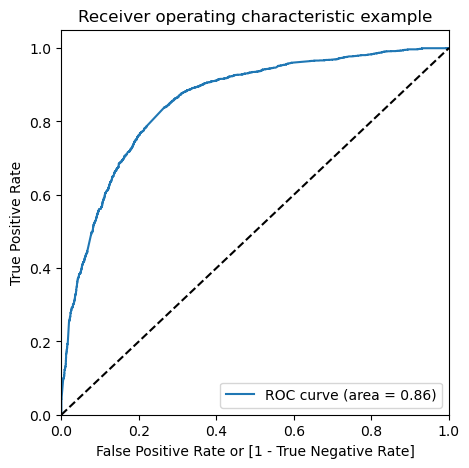

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [69]:
# Since Area under ROC curve is 0.86, model is good.

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
661,1,0.679800,1,1,1,1,1,1,1,1,0,0,0
7895,1,0.493886,0,1,1,1,1,1,0,0,0,0,0
9108,0,0.957297,1,1,1,1,1,1,1,1,1,1,1
991,0,0.398328,0,1,1,1,1,0,0,0,0,0,0
6659,0,0.122819,0,1,1,0,0,0,0,0,0,0,0


In [70]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.427715  1.000000  0.000000
0.1   0.1  0.520787  0.989492  0.170484
0.2   0.2  0.716854  0.922942  0.562827
0.3   0.3  0.762172  0.886602  0.669175
0.4   0.4  0.782397  0.774518  0.788285
0.5   0.5  0.779588  0.688266  0.847840
0.6   0.6  0.764232  0.598511  0.888089
0.7   0.7  0.740262  0.500438  0.919503
0.8   0.8  0.701873  0.356830  0.959751
0.9   0.9  0.636517  0.166813  0.987565


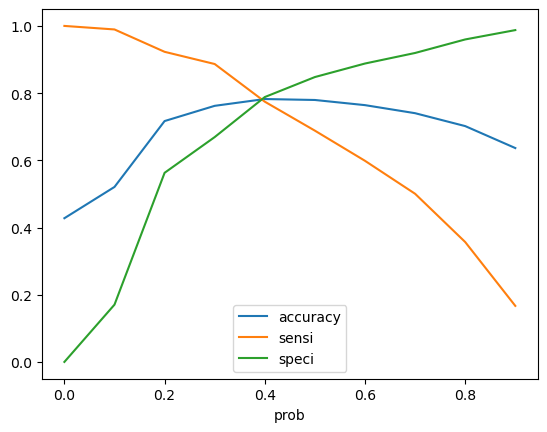

In [71]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff now.

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
661,1,0.679800,1,1,1,1,1,1,1,1,0,0,0,1
7895,1,0.493886,0,1,1,1,1,1,0,0,0,0,0,1
9108,0,0.957297,1,1,1,1,1,1,1,1,1,1,1,1
991,0,0.398328,0,1,1,1,1,0,0,0,0,0,0,1
6659,0,0.122819,0,1,1,0,0,0,0,0,0,0,0,0


In [74]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7777153558052434

In [75]:
# Create confusion matrix again

confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2591  465]
 [ 712 1572]]


In [76]:
# Let's evaluate the other metrics as well

TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

# Calculate the sensitivity

sensiti = TP1/(TP1+FN1)
print("Sensitivity : ", sensiti)

# Calculate the specificity

specifi = TN1/(TN1+FP1)
print("Specificity : ", specifi)

Sensitivity :  0.6882661996497373
Specificity :  0.8478403141361257


In [77]:
# No change in Sensitivity & Specificity much. So, it is ok to proceed further.

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [79]:
# Scale the test set as well using just 'transform'

# Scale the three numeric features present in the dataset

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
747,0.067568,0.125440,0.3125,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3589,0.189189,0.658011,0.4375,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5112,0.054054,0.239877,0.1250,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6492,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5746,0.297297,0.334067,0.2750,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [154]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [156]:
# Drop the same columns we deleted from X_train in X_test as well

X_test_sm.drop(['Lead Origin_Lead Add Form', 'Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
747,1.0,0.067568,0.125440,1,0,0,0,0,0,0,0,0,0,0
3589,1.0,0.189189,0.658011,1,0,0,0,0,0,0,0,0,0,0
5112,1.0,0.054054,0.239877,1,0,0,0,1,0,0,0,0,0,0
6492,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
5746,1.0,0.297297,0.334067,1,0,0,0,0,0,0,0,0,0,0


In [166]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.168407
1,1,0.740583
2,0,0.063106
3,0,0.385628
4,1,0.445484


In [168]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [170]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.168407,0
1,1,0.740583,1
2,0,0.063106,0
3,0,0.385628,1
4,1,0.445484,1


In [172]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7614678899082569

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[929, 363],
       [183, 814]], dtype=int64)

In [180]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Calculate the sensitivity

sensiti = TP2/(TP2+FN2)
print("Sensitivity : ", sensiti)

# Calculate the specificity

specifi = TN2/(TN2+FP2)
print("Specificity : ", specifi)

# Calculate Precision

preci = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
print("Precision : ", preci)


# Calculate Recall

recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print("Recall : ", recall)


Sensitivity :  0.8164493480441324
Specificity :  0.7190402476780186
Precision :  0.6915887850467289
Recall :  0.8164493480441324


In [187]:
# Seems like all paramters are ok. So, model is OK